In [ ]:
import pandas as pd

# 키워드 분류를 위해서 키워드를 사전에 지정
baby_keywords = ["baby", "아기", "아이", "infant", "child"]
positive_keywords = ["happy", "웃음", "laughter", "행복"]
negative_keywords = ["cry", "울음", "annoying", "relaxing", "우는"]
neutral_keywords = ["sleep", "자다", "sleeping", "쉬"]

# 관련이 없지만 관련 있게 판다하는 경우를 방지하기 위해 안티 키워드 지정
anti_keywords = [
    '아이돌', 'K-pop', '케이팝', 'idol', '뮤직비디오', '보이그룹', '걸그룹', '연예인', '스타',
    'Selena', 'selena', 'justin', 'stray', '스트레이', '스키즈', '뮤지컬', '독립', '바보야',
    '얼굴', 'exo', '푸바오', '스킨케어', 'skin', 'care', 'Care', 'make', 'makes','started'
]

# 아이와 관련 있는지 확인하고 관련 있는 데이터의 감정 분류
def classify_and_cluster(row):

    # 제목과 설명을 이용해서 아기와 관련이 있는지 분류
    text = f"{row['title']} {row['description']}"
    related_to_baby = any(keyword in text.lower() for keyword in baby_keywords)

    if not related_to_baby:
        return "Not Related", None
    
    # 키워드를 이용해서 감정 분류
    if any(keyword in text.lower() for keyword in positive_keywords):
        emotion = "Positive"
    elif any(keyword in text.lower() for keyword in negative_keywords):
        emotion = "Negative"
    elif any(keyword in text.lower() for keyword in neutral_keywords):
        emotion = "Neutral"
    else:
        emotion = "Unknown" 

    return "Related", emotion

# 안티 키워드가 들어가 있는 경우 필터링
def contains_anti_keywords(row):
    text = f"{row['title']} {row['description']}"
    return any(keyword in text.lower() for keyword in anti_keywords)

def process_data(data):
    # 너무 좋아요 수, 조회수가 적은 경우 필터링
    data = data[~data.apply(contains_anti_keywords, axis=1)]
    data = data[(data['view_count'] >= 10000) & (data['like_count'] >= 200)]

    data[['relation', 'tag']] = data.apply(classify_and_cluster, axis=1, result_type="expand")

    # 분류 결과 확인
    relation_counts = data['relation'].value_counts()
    emotion_counts = data['tag'].value_counts()

    return relation_counts, emotion_counts, data

data = pd.read_csv('data.csv')

relation_counts, emotion_counts, processed_data_sample = process_data(data)
relation_counts, emotion_counts, processed_data_sample.head()

(Related        344
 Not Related    268
 Name: relation, dtype: int64,
 Negative    153
 Unknown     114
 Positive     48
 Neutral      29
 Name: tag, dtype: int64,
    id                                              title  \
 0   1  요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop cryin...   
 2   3              [아기재우기] 우는아기 5분도 못버티고  잠들게하는 딥슬립 ASMR   
 3   4  -우는아이- And Then is Heard No More 한글자막 [ Librar...   
 4   5  5분만에 꿈나라 직행│쉬~소리+빗소리+물소리│수면교육 백색소음 │10시간 연속재생,...   
 5   6  자장가(lullaby) 브람스( Brahms)아기수면음악 ♫오르골 (Orgel) ♫...   
 
                  created_date  like_count       tag  \
 0  2024-12-06 08:12:40.311465        3785  Negative   
 2  2024-12-06 08:12:40.489102        7186  Negative   
 3  2024-12-06 08:12:40.573289        1547  Negative   
 4  2024-12-06 08:12:40.653249       50307   Neutral   
 5  2024-12-06 08:12:40.754496      272395   Neutral   
 
                                            url  view_count  \
 0  https://www.youtube.com/watch?v=itxHiMlWeBU      665425   
 2 

In [ ]:
processed_data_sample = processed_data_sample[processed_data_sample['relation'] == 'Related']
processed_data_sample = processed_data_sample.drop(columns=['relation'])
processed_data_sample.to_csv('processed_data.csv')

In [ ]:
processed_data = pd.read_csv('processed_data.csv')

unknown_data = processed_data[processed_data['tag'] == 'Unknown']
unknown_data

,Unnamed: 0,id,title,created_date,like_count,tag,url,view_count,description
7,18,19,뽀로로 자장가 | 1시간 이어듣기 | 잠자리 동요 | 우리 아이 꿀잠자는 수면 음악,2024-12-06 08:12:41.756266,37751,Unknown,https://www.youtube.com/watch?v=875Gl5vFEek,14542169,뽀로로의 새로운 영상을 가장 빠르게 만나는 방법! \n지금 바로 뽀롱뽀롱 뽀로로 공...
10,23,24,[200만뷰] 우리 아이 🧑‍🎓 두뇌발달에 좋은 모차르트 음악들 ｜두뇌발달｜감성발달...,2024-12-06 08:12:42.141301,15452,Unknown,https://www.youtube.com/watch?v=YRg0w_5SCdM,3964729,우리 아이 두뇌발달에 좋은 모차르트 음악들 모아듣기! \nEnjoy Universa...
14,38,39,-enlxmffls dis- Children of the City 한글자막 [ Li...,2024-12-06 08:12:43.265752,1462,Unknown,https://www.youtube.com/watch?v=5nOGNzn8BZ0,108539,편집: 문어 형\n그림: 나기 님\n원본영상\n[ Library Of Ruina ]...
19,64,65,자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자...,2024-12-06 08:13:18.378090,116390,Unknown,https://www.youtube.com/watch?v=du17m1rk-48,42390489,자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자...
27,108,109,아기 울때 달래는 방법 1,2024-12-06 08:16:16.370640,5647,Unknown,https://www.youtube.com/watch?v=uEMMx6z-glg,579907,신생아 아기 울때 달래는 방법 1 #shorts #아기 #육아
...,...,...,...,...,...,...,...,...,...
338,1312,1313,My Friend Is a Superhero on Halloween | Funny ...,2024-12-12 03:27:46.151193,9637,Unknown,https://www.youtube.com/watch?v=qfDOdgn6zq8,14025173,🌟😻 SUBSCRIBE TO MY CHANNEL 😻🌟\r\nhttps://www.y...
339,1313,1314,Upbeat Kids Songs | Children's Song Collection...,2024-12-12 03:27:46.649938,10034,Unknown,https://www.youtube.com/watch?v=LuPdIl81llU,4783504,Subscribe to our website for $3.99 USD monthly...
340,1325,1326,Safety Song | Traffic Safety Song | Escalator ...,2024-12-12 03:27:48.368653,20737,Unknown,https://www.youtube.com/watch?v=fiCUBs8pd-Q,38232677,#cocofroco #kidssongs #nursryrhymes #kidsbabys...
342,1335,1336,Boo Boo Bugs Song | Insects Version | Newborn ...,2024-12-12 03:27:58.185999,181569,Unknown,https://www.youtube.com/watch?v=Ogdscl91WdA,62009466,🌈 Get ready for fun and education as each inse...


In [ ]:
import re

def contains_korean(text):
    if pd.isna(text):
        return False
    return bool(re.search("[\uac00-\ud7a3]", text))

unknown_data['language'] = unknown_data.apply(
    lambda row: 'Korean' if contains_korean(row['title']) or contains_korean(row['description']) else 'English',
    axis=1
)
def refine_language(row):
    if row['language'] == 'English' and pd.isna(row['description']):
        return 'English'
    return row['language']

unknown_data['language'] = unknown_data.apply(refine_language, axis=1)
print(unknown_data['language'].value_counts())

en_data = unknown_data[unknown_data['language'] == 'English'].drop(columns=['language'])
ko_data = unknown_data[unknown_data['language'] == 'Korean'].drop(columns=['language'])

Korean     77
English    37
Name: language, dtype: int64


/var/folders/_q/5xkclq3n111fvr_5705lxbdr0000gn/T/ipykernel_2705/828095418.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['language'] = unknown_data.apply(
/var/folders/_q/5xkclq3n111fvr_5705lxbdr0000gn/T/ipykernel_2705/828095418.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_data['language'] = unknown_data.apply(refine_language, axis=1)


In [ ]:
en_data.to_csv('english_data.csv')
ko_data.to_csv('korean_data.csv')

<ipython-input-45-0c7bd045d148>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['description'].fillna('', inplace=True)


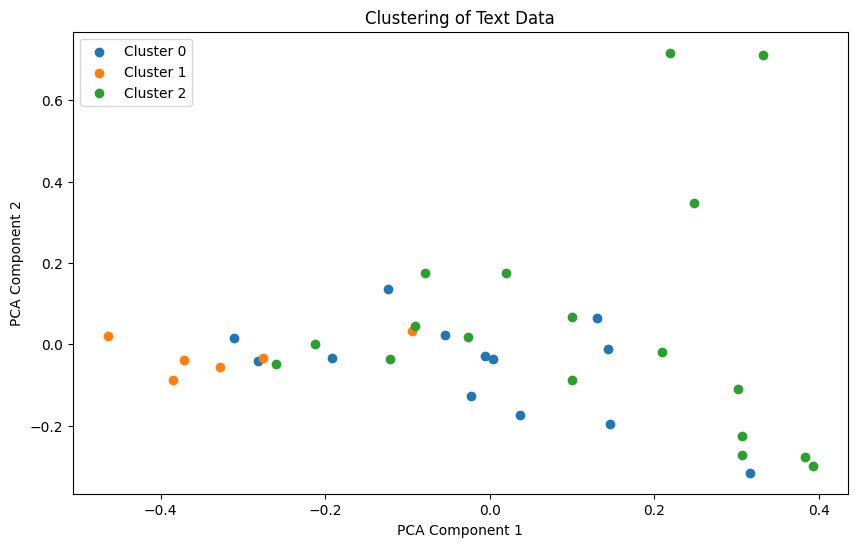

cluster
2    18
0    13
1     6
Name: count, dtype: int64


In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

data = pd.read_csv('/content/drive/MyDrive/test/english_data.csv')

if data['description'].isnull().any():
    data['description'].fillna('', inplace=True)

data['description'] = data['description'].str[:100]
text_data = data['title'] + ' ' + data['description']

additional_stopwords = ['video', 'lullaby',
                         'hours', 'minutes',
                       'children', 'youtube', 'watch', 'channel', 'subscribe',
                       'playlist', 'follow', 'copyright', 'rights']
stopwords = list(ENGLISH_STOP_WORDS) + additional_stopwords

# TF-IDF 벡터 생성
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(text_data)

# 연관성을 통해 KMeans clustering을 통해 3개로 나눔
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

data['cluster'] = clusters

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 시각화를 위해 2차원 데이터로 나타냄
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# 시각화
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(X_reduced[data['cluster'] == cluster, 0],
                X_reduced[data['cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print(data['cluster'].value_counts())

for idx, cluster in enumerate(data['cluster']):
    if cluster == 0:
        data.loc[idx, 'tag'] = 'Negative'
    elif cluster == 1:
        data.loc[idx, 'tag'] = 'Neutral'
    else:
        data.loc[idx, 'tag'] = 'Positive'

data = data.drop('cluster', axis=1)
data.to_csv('/content/drive/MyDrive/test/english_result.csv')

<ipython-input-46-367f8a40ae6c>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['description'].fillna('', inplace=True)


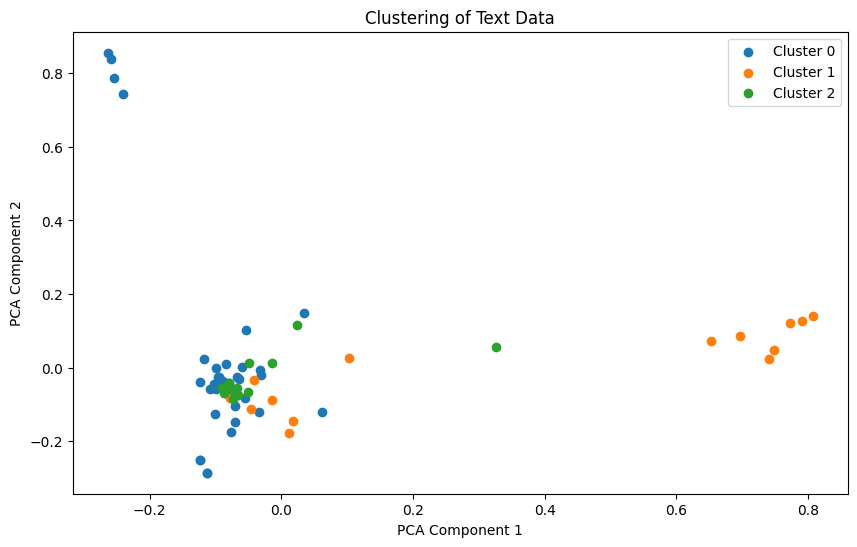

cluster
0    49
1    14
2    14
Name: count, dtype: int64


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def clean_text(text):
    text = re.sub(r'[a-zA-Z]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

# 데이터 읽기
data = pd.read_csv('/content/drive/MyDrive/test/korean_data.csv')

# 결측치 처리
if data['description'].isnull().any():
    data['description'].fillna('', inplace=True)

# 텍스트 데이터 전처리
data['description'] = data['description'].str[:100]
text_data = data['title'] + ' ' + data['description']

cleaned_text = text_data.apply(clean_text)
# 불용어 설정

additional_stopwords = ['다음', '영상', '시간', '하다', '반복', '재생', '같은', '안녕하세요', '저작권',
                       '금지', '불가합니다', '상업적', '광고없음', '분만에', '중간광고', '광고', '만뷰']

stopwords = list(ENGLISH_STOP_WORDS) + additional_stopwords

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(cleaned_text)

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# 클러스터 레이블 추가
data['cluster'] = clusters

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(X_reduced[data['cluster'] == cluster, 0],
                X_reduced[data['cluster'] == cluster, 1],
                label=f'Cluster {cluster}')

plt.title('Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

print(data['cluster'].value_counts())

# 태그 지정
for idx, cluster in enumerate(data['cluster']):
    if cluster == 0:
        data.loc[idx, 'tag'] = 'Neutral'
    elif cluster == 1:
        data.loc[idx, 'tag'] = 'Negative'
    else:
        data.loc[idx, 'tag'] = 'Positive'

data = data.drop('cluster', axis=1)
data.to_csv('/content/drive/MyDrive/test/korean_result.csv')

In [59]:
ko_df = pd.read_csv('/content/drive/MyDrive/test/korean_result.csv')
en_df = pd.read_csv('/content/drive/MyDrive/test/english_result.csv')

processed_df = pd.concat([ko_df, en_df])
processed_df = processed_df.sort_values(by='id')
processed_df = processed_df.reset_index(drop=True)

processed_df = processed_df.drop(columns=['description', 'created_date','Unnamed: 0.2',
                                          'Unnamed: 0.1','Unnamed: 0'])
processed_df['tag'].value_counts()

,count
tag,
Neutral,55
Positive,32
Negative,27


In [64]:
df = pd.read_csv('/content/drive/MyDrive/test/processed_data.csv')
df = df[df['tag'] != 'Unknown']
df = df.drop(columns=['description', 'created_date','Unnamed: 0'])

final_df = pd.concat([df, processed_df])
final_df = final_df.sort_values(by='id')
final_df = final_df.reset_index(drop=True)

final_df = final_df.drop(columns=['id'])
final_df.to_csv('/content/drive/MyDrive/test/final_data.csv')

In [31]:
from requests import get
import isodate
import pandas as pd

def check_video_duration(url):
    try:
        video_id = url.split('watch?v=')[1]
        
        api_key = ''  # API 키 입력
        api_url = 'https://www.googleapis.com/youtube/v3/videos'
        
        params = {
            'id': video_id,
            'key': api_key,
            'part': 'contentDetails'
        }
        
        response = get(api_url, params)
        data = response.json()
        
        if 'items' in data and len(data['items']) > 0:
            duration = data['items'][0]['contentDetails']['duration']
            seconds = isodate.parse_duration(duration).total_seconds()
            return seconds > 600
        return False
        
    except Exception as e:
        print(f"Error checking duration for {url}: {str(e)}")
        return False

# CSV 파일 로드
df = pd.read_csv('final_data.csv')

# 10분 미만 영상 필터링
df['is_long'] = df['url'].apply(check_video_duration)
df_filtered = df[df['is_long']]

In [30]:
df_filtered = df_filtered.drop(columns=['is_long'])
df_filtered.to_csv('final_processed_data.csv')

In [2]:
import pandas as pd

def filter_videos_corrected(dataframe, tag, top_n=5):
    emotion = dataframe[dataframe['tag'] == tag]
    # 내림차순 정렬
    sorted_videos = emotion.sort_values(by='view_count', ascending=False)
    # 추천 진행
    return sorted_videos.head(top_n)
    
data = pd.read_csv('final_processed_data.csv')

corrected_meaningful_videos = filter_videos_corrected(data, tag='Negative', top_n=5)
corrected_meaningful_videos

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,title,like_count,tag,url,view_count
27,27,41,27,2 Hours Super Relaxing Baby Music ♥♥♥ Bedtime ...,1716583,Negative,https://www.youtube.com/watch?v=W-vBu2rf8TI,526705736
51,51,65,51,Colicky Baby Sleeps To This Magic Sound | Whit...,558918,Negative,https://www.youtube.com/watch?v=oewj_XEM1js,280573000
29,29,43,29,Bedtime Lullabies and Calming Undersea Animati...,381198,Negative,https://www.youtube.com/watch?v=LdQJw5S4nAQ,184408116
88,88,126,88,5 Little Ducks song | Newborn Baby Songs & Nur...,294425,Negative,https://www.youtube.com/watch?v=izfUsHZw9bs,122396693
233,233,342,233,Boo Boo Bugs Song | Insects Version | Newborn ...,181569,Negative,https://www.youtube.com/watch?v=Ogdscl91WdA,62009466


In [4]:
import yt_dlp
import pandas as pd
import os

# downloads 디렉토리 생성
if not os.path.exists('downloads'):
    os.makedirs('downloads')

def download_audio(url, index, title):
    ydl_opts = {
        'format': 'bestaudio/best',
        # 파일명에 인덱스와 제목 포함
        'outtmpl': f'downloads/{index:03d}_{title}.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
            'preferredquality': '320',
        }]
    }
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            video_info = ydl.extract_info(url, download=True)
            print(f'인덱스 {index} - {title} 다운로드 완료!')
            return True
    except Exception as e:
        print(f"인덱스 {index} - {title} 다운로드 실패: {str(e)}")
        return False

data = pd.read_csv('final_processed_data.csv')

# DataFrame의 인덱스와 제목, URL 모두 사용
for index, row in data.iterrows():
    download_audio(row['url'], index, row['title'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=itxHiMlWeBU
[youtube] itxHiMlWeBU: Downloading webpage
[youtube] itxHiMlWeBU: Downloading ios player API JSON
[youtube] itxHiMlWeBU: Downloading mweb player API JSON
[youtube] itxHiMlWeBU: Downloading m3u8 information
[info] itxHiMlWeBU: Downloading 1 format(s): 251
[download] Destination: downloads/000_요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :).webm
[download] 100% of   38.97MiB in 00:00:01 at 29.63MiB/s    
[ExtractAudio] Destination: downloads/000_요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :).mp3
Deleting original file downloads/000_요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :).webm (pass -k to keep)
인덱스 0 - 요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :) 다운로드 완료!
[youtube] Extracting URL: https://www.youtube.com/watch?v=9d-Vf4a1y3c
[youtube] 9d-Vf4a1y3c: Downloading webpage
[youtube] 9d-Vf4a1y3

[youtube] 18VWLLPu9TY: Downloading m3u8 information
[info] 18VWLLPu9TY: Downloading 1 format(s): 251
[download] Destination: downloads/024_[무광고]모차르트 4시간 연속 재생 / 태교 음악 / 아기 클래식 / 아기 두뇌 개발.webm
[download] 100% of  288.08MiB in 00:00:11 at 24.26MiB/s    
[ExtractAudio] Destination: downloads/024_[무광고]모차르트 4시간 연속 재생 / 태교 음악 / 아기 클래식 / 아기 두뇌 개발.mp3
Deleting original file downloads/024_[무광고]모차르트 4시간 연속 재생 / 태교 음악 / 아기 클래식 / 아기 두뇌 개발.webm (pass -k to keep)
인덱스 24 - [무광고]모차르트 4시간 연속 재생 / 태교 음악 / 아기 클래식 / 아기 두뇌 개발 다운로드 완료!
[youtube] Extracting URL: https://www.youtube.com/watch?v=69O1ynXwE_k
[youtube] 69O1ynXwE_k: Downloading webpage
[youtube] 69O1ynXwE_k: Downloading ios player API JSON
[youtube] 69O1ynXwE_k: Downloading mweb player API JSON
[youtube] 69O1ynXwE_k: Downloading m3u8 information
[info] 69O1ynXwE_k: Downloading 1 format(s): 251
[download] Destination: downloads/025_신생아 음악은 지능을 향상시킵니다 ♫♫♫ 2021 년 임신과 태아를위한 음악 선택.webm
[download] 100% of  439.66MiB in 00:00:15 at 28.67MiB/s    
[Extra

[youtube] R1IZFpaL9hQ: Downloading m3u8 information
[info] R1IZFpaL9hQ: Downloading 1 format(s): 140
[download] Destination: downloads/118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.m4a
[download] 100% of   85.18MiB in 00:00:02 at 37.72MiB/s    
[FixupM4a] Correcting container of "downloads/118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.m4a"
[ExtractAudio] Destination: downloads/118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.mp3
Deleting original file downloads/118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.m4a (pass -k to keep)
인덱스 118 - 자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가 다운로드 완료!
[youtube] Extracting URL: https://www.youtube.com/watch?v=dlFXIXgfPgI
[youtube] dlFXIXgfPgI: Downloading webpage
[youtube] dlFXIXgfPgI: Downloading ios player API JSON
[youtube] dlFXIXgfPgI: Downloading mweb player API JSON
[youtube] dlFXIXgfPgI: Downloading m3u8 information
[info] dlFXIXgfPgI: Downloading 1 format(s): 251
[download] Destination: downloads/119_아기 백색 잡음.webm
[download] 100% of   15.59MiB in 00:00:00 at 33.98MiB/s    
[Extra

In [33]:
import os
import subprocess

def cut_audio_ffmpeg(input_file, output_file, duration=600):  # duration in seconds (10 minutes = 600 seconds)
    command = [
        "ffmpeg",
        "-i", input_file,
        "-t", str(duration),  
        "-acodec", "copy",  
        output_file
    ]
    subprocess.run(command, check=True)

def process_multiple_files_ffmpeg(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    for filename in os.listdir(input_directory):
        if filename.endswith(".mp3"):
            input_path = os.path.join(input_directory, filename)
            output_path = os.path.join(output_directory, f"{filename}")
            print(f"Processing: {filename}")
            cut_audio_ffmpeg(input_path, output_path)
            print(f"Done: {filename}")

# Example usage
process_multiple_files_ffmpeg("downloads", "output")

Processing: 179_Quiet Classroom Music For Children - Calming Sensory Bubbles - Morning music for class.mp3
Done: 179_Quiet Classroom Music For Children - Calming Sensory Bubbles - Morning music for class.mp3
Processing: 111_FOUR HOURS of Baby Songs | Wheels Go Round and Round | Little Baby Bum Nursery Rhymes | Baby TV.mp3
Done: 111_FOUR HOURS of Baby Songs | Wheels Go Round and Round | Little Baby Bum Nursery Rhymes | Baby TV.mp3
Processing: 212_어린이집 자장가 1위 음악 아이들이 좋아하는 수면 취침 음악 꿀잠 자는 마약같은 뮤직입니다..mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 212_어린이집 자장가 1위 음악 아이들이 좋아하는 수면 취침 음악 꿀잠 자는 마약같은 뮤직입니다..mp3
Processing: 211_자장가연속듣기▶동요자장가 - 어린이 자장가 어린이집에서 틀어주는 EQ발달 기능성자장가 베스트 모음집.mp3
Done: 211_자장가연속듣기▶동요자장가 - 어린이 자장가 어린이집에서 틀어주는 EQ발달 기능성자장가 베스트 모음집.mp3
Processing: 032_12 Hours of Relaxing Baby Sleep Music: Playground Adventures | Calm Piano Music for Kids and Babies.mp3
Done: 032_12 Hours of Relaxing Baby Sleep Music: Playground Adventures | Calm Piano Music for Kids and Babies.mp3
Processing: 230_My Friend Is a Superhero on Halloween | Funny Kids Songs 😻🐨🐰🦁 And Nursery Rhymes by Baby Zoo.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 230_My Friend Is a Superhero on Halloween | Funny Kids Songs 😻🐨🐰🦁 And Nursery Rhymes by Baby Zoo.mp3
Processing: 017_아기울음 뚝 그치는소리, 아기들이 잘보는 동물소리모음,.mp3
Done: 017_아기울음 뚝 그치는소리, 아기들이 잘보는 동물소리모음,.mp3
Processing: 148_Baby Don't Cry & More | Kids Songs and Nursery Rhymes | The Mik Maks.mp3
Done: 148_Baby Don't Cry & More | Kids Songs and Nursery Rhymes | The Mik Maks.mp3
Processing: 012_#아기자장가 🌟 동요 ver. 작은 세상, 작은 별, 고향의 봄 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 012_#아기자장가 🌟 동요 ver. 작은 세상, 작은 별, 고향의 봄 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Processing: 192_물소리 수면 백색소음 세면대물소리 ASMR 10시간 연속 재생 + 검은 화면 (신생아 수면 아기 꿀잠 재우기) - 소소ASMR (baby sleep nap, whitenoise).mp3
Done: 192_물소리 수면 백색소음 세면대물소리 ASMR 10시간 연속 재생 + 검은 화면 (신생아 수면 아기 꿀잠 재우기) - 소소ASMR (baby sleep nap, whitenoise).mp3
Processing: 022_모차르트 베스트 100분 연속 (무광고) 집중력을 높이는 음악🍎Mozart BEST 100 minute Relaxation Music 집중력을 높여주는 클래식 莫扎 モーツアルト名曲.mp3
Done: 022_모차르트 베스트 100분 연속 (무광고) 집중력을 높이는 음악🍎Mozart BEST 100 minute Relaxation Music 집중력을 높여주는 클래식 莫扎 モーツアルト名曲.mp3
Processing: 218_Happy Birthday - Happy Birthday Song - Happy Birthday To You +More Nursery Rhymes - Banana Cartoon.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 218_Happy Birthday - Happy Birthday Song - Happy Birthday To You +More Nursery Rhymes - Banana Cartoon.mp3
Processing: 170_Naptime Music for Babies | Lullaby Time: Soothing Sounds for Baby | Baby Einstein.mp3
Done: 170_Naptime Music for Babies | Lullaby Time: Soothing Sounds for Baby | Baby Einstein.mp3
Processing: 204_♥기분좋게 잠드는 오르골자장가 3시간♥ 아기자장가 아가수면음악 우는아이 재우는 꿀잠 수면음악 신생아 유아Baby Orgel Cradle Lullabies Sleep.mp3
Done: 204_♥기분좋게 잠드는 오르골자장가 3시간♥ 아기자장가 아가수면음악 우는아이 재우는 꿀잠 수면음악 신생아 유아Baby Orgel Cradle Lullabies Sleep.mp3
Processing: 197_🥰 아이가 좋아하는 태교음악 🤰 .mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 197_🥰 아이가 좋아하는 태교음악 🤰 .mp3
Processing: 094_If You Are Happy + More Nursery Rhymes & Baby Songs - Kidsberry.mp3
Done: 094_If You Are Happy + More Nursery Rhymes & Baby Songs - Kidsberry.mp3
Processing: 000_요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :).mp3
Done: 000_요청!_아이 울음 뚝 그치는 소리 1시간버전(Sound baby stop crying *1hour ver.*) 울음소리보다 크게 트세요 :).mp3
Processing: 181_Relaxing Deep Sleep Music 🎵 Fall Asleep Easy | Nap Time | Bedtime Music | Quiet Time.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 181_Relaxing Deep Sleep Music 🎵 Fall Asleep Easy | Nap Time | Bedtime Music | Quiet Time.mp3
Processing: 061_🍅동요연속듣기🥦 최신! 인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Done: 061_🍅동요연속듣기🥦 최신! 인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Processing: 048_SOOTHING MUSIC FOR BABIES TO SLEEP - Relaxing Instrumental Lullaby for Hiperactive Kids.mp3
Done: 048_SOOTHING MUSIC FOR BABIES TO SLEEP - Relaxing Instrumental Lullaby for Hiperactive Kids.mp3
Processing: 210_뽀로로 자장가 | 1시간 이어듣기 | 중간광고 없는 자장가 | 우리 아기 숙면유도 | 뽀로로와노래해요.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 210_뽀로로 자장가 | 1시간 이어듣기 | 중간광고 없는 자장가 | 우리 아기 숙면유도 | 뽀로로와노래해요.mp3
Processing: 072_신나는 동요 피아노 연주곡 모음1_지치고 우울할 때.mp3
Done: 072_신나는 동요 피아노 연주곡 모음1_지치고 우울할 때.mp3
Processing: 107_아이가 좋아하는 영어동요. 광고없는 1시간 20분.mp3
Done: 107_아이가 좋아하는 영어동요. 광고없는 1시간 20분.mp3
Processing: 199_신생아 음악은 지능을 향상시킵니다 ♫♫♫ Top 2022 신생아 음악 - 아기자장가.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 199_신생아 음악은 지능을 향상시킵니다 ♫♫♫ Top 2022 신생아 음악 - 아기자장가.mp3
Processing: 007_어린이집 자장가 1위 음악 아이들이 좋아하는 수면 취침 음악 꿀잠 자는 마약같은 뮤직입니다. 브람스자장가.mp3
Done: 007_어린이집 자장가 1위 음악 아이들이 좋아하는 수면 취침 음악 꿀잠 자는 마약같은 뮤직입니다. 브람스자장가.mp3
Processing: 150_Baby Don't Cry + MORE | Kids Funny Songs.mp3
Done: 150_Baby Don't Cry + MORE | Kids Funny Songs.mp3
Processing: 180_Quiet Music For Kids In The Classroom - swirling paint, mesmerizing patterns, sensory video for ADHD.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 180_Quiet Music For Kids In The Classroom - swirling paint, mesmerizing patterns, sensory video for ADHD.mp3
Processing: 200_뽀로로와노래해요 NEW1 전편 | 40분 이어보기 이어보기 | 유튜브 최초공개!.mp3
Done: 200_뽀로로와노래해요 NEW1 전편 | 40분 이어보기 이어보기 | 유튜브 최초공개!.mp3
Processing: 207_#아기자장가 🦄 동요 ver. 할아버지의 낡은 시계, 소나무야, 대니보이 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Done: 207_#아기자장가 🦄 동요 ver. 할아버지의 낡은 시계, 소나무야, 대니보이 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Processing: 229_Surprise Eggs Kids Songs | Leo Nursery Rhymes & Baby Songs.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 229_Surprise Eggs Kids Songs | Leo Nursery Rhymes & Baby Songs.mp3
Processing: 100_Baby Music - 7 Hours of Music - Mozart, Beethoven and Schubert.mp3
Done: 100_Baby Music - 7 Hours of Music - Mozart, Beethoven and Schubert.mp3
Processing: 028_12 Hours of Relaxing Baby Music: Still Dreaming | Piano Music for Kids and Babies.mp3
Done: 028_12 Hours of Relaxing Baby Music: Still Dreaming | Piano Music for Kids and Babies.mp3
Processing: 010_1시간🎹 | 섬집 아기 | 자장가 | DONNI(이도니) Cover 엄마가 불러주던 노래.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 010_1시간🎹 | 섬집 아기 | 자장가 | DONNI(이도니) Cover 엄마가 불러주던 노래.mp3
Processing: 164_Soothing Bedtime Lullabies for Babies - Relaxing Sleep Music - Leigha Marina.mp3
Done: 164_Soothing Bedtime Lullabies for Babies - Relaxing Sleep Music - Leigha Marina.mp3
Processing: 120_[Original] 신생아 자장가 엄마뱃속 소리 + 쉬~소리 백색소음 (10시간) | 자궁소리 ASMR과 그림영상.mp3
Done: 120_[Original] 신생아 자장가 엄마뱃속 소리 + 쉬~소리 백색소음 (10시간) | 자궁소리 ASMR과 그림영상.mp3
Processing: 193_아름답고 잔잔한 릴랙싱 한국 피아노 모음 1시간 - 수면음악, 숙면음악, 자기 전 듣기좋은 피아노.mp3


[out#0/mp3 @ 0x60000235c000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.54e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 193_아름답고 잔잔한 릴랙싱 한국 피아노 모음 1시간 - 수면음악, 숙면음악, 자기 전 듣기좋은 피아노.mp3
Processing: 187_12시간 모짜르트 자장가와 빗소리 ASMR 잠 못드는 우리 아기 깨지않고 깊게 재워주는 음악..mp3
Done: 187_12시간 모짜르트 자장가와 빗소리 ASMR 잠 못드는 우리 아기 깨지않고 깊게 재워주는 음악..mp3
Processing: 021_내가 먼저야 💢 | 생활습관 편 | 27분 동요모음 | 키키묘묘 | 어린이의 바른생활 | 교육동요 모음집 | 안전교육 | 노래 | 베이비버스 인기동요 동화 | BabyBus.mp3
Done: 021_내가 먼저야 💢 | 생활습관 편 | 27분 동요모음 | 키키묘묘 | 어린이의 바른생활 | 교육동요 모음집 | 안전교육 | 노래 | 베이비버스 인기동요 동화 | BabyBus.mp3
Processing: 151_Rain Rain Go Away | Animal Version | Newborn Baby Songs & Nursery Rhymes.mp3


[out#0/mp3 @ 0x600003df8480] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.54e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 151_Rain Rain Go Away | Animal Version | Newborn Baby Songs & Nursery Rhymes.mp3
Processing: 075_🐮동요연속듣기🐴 인기동요모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣ율동동요ㅣEducational Songs for Children.mp3
Done: 075_🐮동요연속듣기🐴 인기동요모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣ율동동요ㅣEducational Songs for Children.mp3
Processing: 045_relaxing sleep music for babies with Waterfall sounds, Nature Sounds.mp3
Done: 045_relaxing sleep music for babies with Waterfall sounds, Nature Sounds.mp3
Processing: 014_ASMR, 아기울음 뚝 그치는 드라이기소리, 1시간, hair drier for baby,ralexation,1hour.mp3


[out#0/mp3 @ 0x600000ec8000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.09 bitrate= 320.0kbits/s speed=1.57e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 014_ASMR, 아기울음 뚝 그치는 드라이기소리, 1시간, hair drier for baby,ralexation,1hour.mp3
Processing: 099_Sleeping and relaxing Lullabies - Baby Jazz - Happy Music for Happy Babies.mp3
Done: 099_Sleeping and relaxing Lullabies - Baby Jazz - Happy Music for Happy Babies.mp3
Processing: 133_[섬집아기] 3시간 연속재생, 마음이 따뜻해지는 피아노 자장가 음악, 중간광고 x.mp3
Done: 133_[섬집아기] 3시간 연속재생, 마음이 따뜻해지는 피아노 자장가 음악, 중간광고 x.mp3
Processing: 166_Moon and Stars Lullaby for Babies | Soothing Voice & Relaxing Sleep Music.mp3


[out#0/mp3 @ 0x60000210c000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.14 bitrate= 319.9kbits/s speed=1.46e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 166_Moon and Stars Lullaby for Babies | Soothing Voice & Relaxing Sleep Music.mp3
Processing: 114_Baby Music Class (full class) Great for babies, toddlers & preschool! Toddler Learning Video Songs.mp3
Done: 114_Baby Music Class (full class) Great for babies, toddlers & preschool! Toddler Learning Video Songs.mp3
Processing: 060_Baby Sensory - Dancing Shapes - Fun High Contrast Animation (stop crying baby).mp3
Done: 060_Baby Sensory - Dancing Shapes - Fun High Contrast Animation (stop crying baby).mp3
Processing: 036_Relaxing Baby Sleep Music: Firefly Beetles | 12 Hours of Piano Music for Kids | Soft Sleeping Music.mp3


[out#0/mp3 @ 0x600001f90000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.55e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 036_Relaxing Baby Sleep Music: Firefly Beetles | 12 Hours of Piano Music for Kids | Soft Sleeping Music.mp3
Processing: 043_PUT THIS SONG ON AND WATCH YOUR BABY FALL ASLEEP IN 3 MINUTES! Lullaby for Toddlers to go to Sleep.mp3
Done: 043_PUT THIS SONG ON AND WATCH YOUR BABY FALL ASLEEP IN 3 MINUTES! Lullaby for Toddlers to go to Sleep.mp3
Processing: 106_아이가 좋아하는 동요모음. 2시간 20분.mp3
Done: 106_아이가 좋아하는 동요모음. 2시간 20분.mp3
Processing: 110_2 Hours Super Relaxing Baby Music ♥♥♥ Bedtime Lullaby For Sweet Dreams ♫♫♫ Sleep Music.mp3


[out#0/mp3 @ 0x600000170000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 110_2 Hours Super Relaxing Baby Music ♥♥♥ Bedtime Lullaby For Sweet Dreams ♫♫♫ Sleep Music.mp3
Processing: 136_유아동요 모음 어린이동요 연속듣기 [큐리동요모음].mp3
Done: 136_유아동요 모음 어린이동요 연속듣기 [큐리동요모음].mp3
Processing: 089_Happy music for a happy soul ☀️Swinging Morning ☀️Baby Songs.mp3
Done: 089_Happy music for a happy soul ☀️Swinging Morning ☀️Baby Songs.mp3
Processing: 096_Classical Piano Music for Babies ❤️Baby Mozart ❤️Happy Songs.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 096_Classical Piano Music for Babies ❤️Baby Mozart ❤️Happy Songs.mp3
Processing: 196_3시간 잔잔한 수면음악 + 풀벌레소리 🎵 스트레스 해소음악, 잠잘때 듣는 음악, 불면증치료음악, 수면유도음악 (My Dream).mp3
Done: 196_3시간 잔잔한 수면음악 + 풀벌레소리 🎵 스트레스 해소음악, 잠잘때 듣는 음악, 불면증치료음악, 수면유도음악 (My Dream).mp3
Processing: 005_[중간광고X] Hair Dryer 10hrs 드라이기소리, 10시간, 아기재우기, 신생아 자장가 백색소음, 수면교육.mp3
Done: 005_[중간광고X] Hair Dryer 10hrs 드라이기소리, 10시간, 아기재우기, 신생아 자장가 백색소음, 수면교육.mp3
Processing: 127_[똑게육아 백색소음] 진정 쉬~소리, 똑게 진정 사운드 12시간 [밤잠.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 127_[똑게육아 백색소음] 진정 쉬~소리, 똑게 진정 사운드 12시간 [밤잠.mp3
Processing: 009_신생아 백색소음 자장가, 엄마 자궁 뱃속 소리  완벽재현 , 심장박동 + 쉬~소리 백색소음 (10시간연속듣기) ,Womb Sound with Shhh by 힐링메이트.mp3
Done: 009_신생아 백색소음 자장가, 엄마 자궁 뱃속 소리  완벽재현 , 심장박동 + 쉬~소리 백색소음 (10시간연속듣기) ,Womb Sound with Shhh by 힐링메이트.mp3
Processing: 184_Morning Relaxing Music For Children - Childhood Memories (Hayfield).mp3
Done: 184_Morning Relaxing Music For Children - Childhood Memories (Hayfield).mp3
Processing: 118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 118_자장가연속듣기▶행복한 자장가 - 우는아이 재우는 오르골 자장가.mp3
Processing: 125_신생아재우기 - 우는 아기 꿀잠자는!😴 쉬~소리+심장소리+빗소리 10시간!, 5분뒤 화면꺼짐, 태아가 느끼는 엄마뱃속 소리 재현! 신생아 안정, 백색소음, 수면음악, 수면발달유도.mp3
Done: 125_신생아재우기 - 우는 아기 꿀잠자는!😴 쉬~소리+심장소리+빗소리 10시간!, 5분뒤 화면꺼짐, 태아가 느끼는 엄마뱃속 소리 재현! 신생아 안정, 백색소음, 수면음악, 수면발달유도.mp3
Processing: 201_인기 크리스마스 캐롤 모음 24분🎄 | 캐롤 연속듣기 | 크리스마스 캐롤 | 캐롤 동요 | 톰토미 (TOMTOMI).mp3
Done: 201_인기 크리스마스 캐롤 모음 24분🎄 | 캐롤 연속듣기 | 크리스마스 캐롤 | 캐롤 동요 | 톰토미 (TOMTOMI).mp3
Processing: 223_Relaxing Aquatic Music for Babies - 3 Hours - Baby Lullabies.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 223_Relaxing Aquatic Music for Babies - 3 Hours - Baby Lullabies.mp3
Processing: 160_Baby Lullaby and Soothing Sea Waves Sounds ♫❤ Baby Sleep Music ♫❤.mp3
Done: 160_Baby Lullaby and Soothing Sea Waves Sounds ♫❤ Baby Sleep Music ♫❤.mp3
Processing: 042_Row Row Row your Boat! - Baby Sensory – Calming Bedtime Songs for Babies – 1 HOUR!.mp3
Done: 042_Row Row Row your Boat! - Baby Sensory – Calming Bedtime Songs for Babies – 1 HOUR!.mp3
Processing: 039_TWO HOURS of gentle lullabies for babies - Baby Sleep Music.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 039_TWO HOURS of gentle lullabies for babies - Baby Sleep Music.mp3
Processing: 001_[아기재우기] 우는아기 5분도 못버티고  잠들게하는 딥슬립 ASMR.mp3
Done: 001_[아기재우기] 우는아기 5분도 못버티고  잠들게하는 딥슬립 ASMR.mp3
Processing: 159_Baby Lullaby. Soothing fishes.Calming Undersea Animation. Aquarium 🐟 💤.mp3
Done: 159_Baby Lullaby. Soothing fishes.Calming Undersea Animation. Aquarium 🐟 💤.mp3
Processing: 024_[무광고]모차르트 4시간 연속 재생 .mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 024_[무광고]모차르트 4시간 연속 재생 .mp3
Processing: 087_Music for Babies ☀️ Easy Morning ☀️ Lullabies for your baby.mp3
Done: 087_Music for Babies ☀️ Easy Morning ☀️ Lullabies for your baby.mp3
Processing: 066_41곡 | Muffin Man, Bingo, Humpty Dumpty, Hokey Pokey 등 세계 유명 인기동요 | 리틀팍스 영어동요 | 너서리 라임.mp3
Done: 066_41곡 | Muffin Man, Bingo, Humpty Dumpty, Hokey Pokey 등 세계 유명 인기동요 | 리틀팍스 영어동요 | 너서리 라임.mp3
Processing: 078_Train Choo Choo Song | Newborn Baby Songs & Nursery Rhymes.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 078_Train Choo Choo Song | Newborn Baby Songs & Nursery Rhymes.mp3
Processing: 108_NEW 뽀로로 동물 동요 | 뽀로로와 귀여운 동물친구들 | 멍멍멍! 아기 강아지 야옹야옹~ 아기 고양이 | 뽀로로와 노래해요.mp3
Done: 108_NEW 뽀로로 동물 동요 | 뽀로로와 귀여운 동물친구들 | 멍멍멍! 아기 강아지 야옹야옹~ 아기 고양이 | 뽀로로와 노래해요.mp3
Processing: 163_Bedtime Lullaby and  Soothing Fish Animation 🐟 Baby Lullaby 💤 Baby Sleep Music ♫.mp3
Done: 163_Bedtime Lullaby and  Soothing Fish Animation 🐟 Baby Lullaby 💤 Baby Sleep Music ♫.mp3
Processing: 093_Nursery Rhymes for Babies | If You Are Happy + More Kids Songs | Twinkle Little Songs.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 093_Nursery Rhymes for Babies | If You Are Happy + More Kids Songs | Twinkle Little Songs.mp3
Processing: 051_Colicky Baby Sleeps To This Magic Sound | White Noise 10 Hours | Soothe crying infant.mp3
Done: 051_Colicky Baby Sleeps To This Magic Sound | White Noise 10 Hours | Soothe crying infant.mp3
Processing: 102_Happy music for happy Babies - Jazz Lullabies.mp3
Done: 102_Happy music for happy Babies - Jazz Lullabies.mp3
Processing: 047_Twinkle Twinkle Little Star! - Calming Sensory Animation - Baby Songs – Infant Visual Stimulation🌙✨.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 047_Twinkle Twinkle Little Star! - Calming Sensory Animation - Baby Songs – Infant Visual Stimulation🌙✨.mp3
Processing: 190_[Original] 빗소리 asmr 10시간 + 쉬~소리 | 불면증 | 수면유도 | 백색소음 | 아기재우는 소리와 드라이브 영상.mp3
Done: 190_[Original] 빗소리 asmr 10시간 + 쉬~소리 | 불면증 | 수면유도 | 백색소음 | 아기재우는 소리와 드라이브 영상.mp3
Processing: 015_자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자장가노래 ♫ 유아자장가 수면유도음악.mp3
Done: 015_자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자장가노래 ♫ 유아자장가 수면유도음악.mp3
Processing: 029_Bedtime Lullabies and Calming Undersea Animation: Baby Lullaby.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 029_Bedtime Lullabies and Calming Undersea Animation: Baby Lullaby.mp3
Processing: 173_Soothing Cartoons and Bedtime Songs for Kids : Dreamy Lullabies with Beadies LIVE.mp3
Done: 173_Soothing Cartoons and Bedtime Songs for Kids : Dreamy Lullabies with Beadies LIVE.mp3
Processing: 124_시끄럽지 않은 진공청소기 소리🎧 · 아기 수면교육 [4시간] 백색소음 I Vacuum cleaner ASMR.mp3
Done: 124_시끄럽지 않은 진공청소기 소리🎧 · 아기 수면교육 [4시간] 백색소음 I Vacuum cleaner ASMR.mp3
Processing: 176_💤 Best Lullabies for the Littlest Ones! lullabies for babies to go to sleep & lullabies for all ages.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 176_💤 Best Lullabies for the Littlest Ones! lullabies for babies to go to sleep & lullabies for all ages.mp3
Processing: 116_Baby Classical ✨ MOZART FOR BABIES✨ Piano Music for Babies.mp3
Done: 116_Baby Classical ✨ MOZART FOR BABIES✨ Piano Music for Babies.mp3
Processing: 115_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Done: 115_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Processing: 067_(가사있는) 초등 교과서 수록 인기 동요 3.mp3


[out#0/mp3 @ 0x600001d64000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.57e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 067_(가사있는) 초등 교과서 수록 인기 동요 3.mp3
Processing: 146_Baby Sleep Music ♫ Overcome Insomnia ♥ Mozart Brahms Lullaby - Sleep Instantly Within 3 Minutes.mp3
Done: 146_Baby Sleep Music ♫ Overcome Insomnia ♥ Mozart Brahms Lullaby - Sleep Instantly Within 3 Minutes.mp3
Processing: 153_ASMR Sleep Like a Baby! 100+ Triggers Collection For Sleep (ASMR No Talking).mp3
Done: 153_ASMR Sleep Like a Baby! 100+ Triggers Collection For Sleep (ASMR No Talking).mp3
Processing: 053_Baby Sensory Caterpillar's Garden. High Contrast Eye Tracking for Babies.mp3


[out#0/mp3 @ 0x6000039803c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.59e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 053_Baby Sensory Caterpillar's Garden. High Contrast Eye Tracking for Babies.mp3
Processing: 123_신생아 재우기 백색소음 쉬~소리 (10시간 연속재생) white noise.mp3
Done: 123_신생아 재우기 백색소음 쉬~소리 (10시간 연속재생) white noise.mp3
Processing: 183_SEE INFO👇Relax Music for Stress Relief | Study & Background Music | Sleep Meditation Music 💜 528Hz.mp3
Done: 183_SEE INFO👇Relax Music for Stress Relief | Study & Background Music | Sleep Meditation Music 💜 528Hz.mp3
Processing: 046_Relaxing Music for Kids: You Are My Sunshine 🌞 12 Hours of Sleeping Video for Babies | Dreamy Video.mp3


[out#0/mp3 @ 0x6000006ec000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.63e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 046_Relaxing Music for Kids: You Are My Sunshine 🌞 12 Hours of Sleeping Video for Babies | Dreamy Video.mp3
Processing: 175_10-Hour Super Relaxing Baby Lullaby Music - Sensory Sleep Music - Baby – Calming Bedtime Songs  🌙✨.mp3
Done: 175_10-Hour Super Relaxing Baby Lullaby Music - Sensory Sleep Music - Baby – Calming Bedtime Songs  🌙✨.mp3
Processing: 188_[12시간] 쉬소리 + 빗소리 asmr | 아기 수면교육 | 청력 보호 백색소음 | 여행 영상 | 중간광고 없음.mp3
Done: 188_[12시간] 쉬소리 + 빗소리 asmr | 아기 수면교육 | 청력 보호 백색소음 | 여행 영상 | 중간광고 없음.mp3
Processing: 162_SUPER SOOTHING MAGIC LULLABY: The Best Bedtime Music To Help Your Baby Fall Asleep Faster.mp3


[out#0/mp3 @ 0x600000d50000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.56e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 162_SUPER SOOTHING MAGIC LULLABY: The Best Bedtime Music To Help Your Baby Fall Asleep Faster.mp3
Processing: 202_[2018 웃는아이TV] "전주공연making" 무대뒤 "초 리얼"한 모습!! 보시죠~!!.mp3
Done: 202_[2018 웃는아이TV] "전주공연making" 무대뒤 "초 리얼"한 모습!! 보시죠~!!.mp3
Processing: 167_Lullabу and Calming Undersea Animation. Lullaby Aquarium . Soothing fishes. Baby Sleep Music..mp3
Done: 167_Lullabу and Calming Undersea Animation. Lullaby Aquarium . Soothing fishes. Baby Sleep Music..mp3
Processing: 231_Upbeat Kids Songs | Children's Song Collection | The Singing Walrus.mp3


[out#0/mp3 @ 0x600001a78000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.3e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-l

Done: 231_Upbeat Kids Songs | Children's Song Collection | The Singing Walrus.mp3
Processing: 095_Happy Instrumental Jazz for Kids in the Classroom - Baby Jazz - Happy Music for Happy Babies -.mp3
Done: 095_Happy Instrumental Jazz for Kids in the Classroom - Baby Jazz - Happy Music for Happy Babies -.mp3
Processing: 080_Baby Dance Song Collection | Eli Kids Songs, Nursery Rhymes, Dances, Cartoons.mp3
Done: 080_Baby Dance Song Collection | Eli Kids Songs, Nursery Rhymes, Dances, Cartoons.mp3
Processing: 131_3시간 포근한 수면음악 + 풀벌레소리 🎵 스트레스해소음악, 잠잘때듣는음악, 힐링음악, 잠오는음악 (Nostalgia).mp3


[out#0/mp3 @ 0x6000017b0000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.46e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 131_3시간 포근한 수면음악 + 풀벌레소리 🎵 스트레스해소음악, 잠잘때듣는음악, 힐링음악, 잠오는음악 (Nostalgia).mp3
Processing: 195_찬양자장가 | 우리아이축복송 | CCM Lullaby | Deep Sleep Piano |​​​ Bed Time | Baby Music.mp3
Done: 195_찬양자장가 | 우리아이축복송 | CCM Lullaby | Deep Sleep Piano |​​​ Bed Time | Baby Music.mp3
Processing: 056_Rock-a-bye Baby lullaby 💤 Bedtimes songs and nursery rhymes - HeyKids.mp3
Done: 056_Rock-a-bye Baby lullaby 💤 Bedtimes songs and nursery rhymes - HeyKids.mp3
Processing: 203_5분 안에 아기 재우는 #백색소음 (빗소리+아~)_ #아닥 _ 아~하면서 토닥이기 _ #아기재우는방법.mp3


[out#0/mp3 @ 0x600001060000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 203_5분 안에 아기 재우는 #백색소음 (빗소리+아~)_ #아닥 _ 아~하면서 토닥이기 _ #아기재우는방법.mp3
Processing: 013_울음뚝 바로꿀잠 I 빗소리 쉬소리 I 수면백색소음 I 10시간연속.mp3
Done: 013_울음뚝 바로꿀잠 I 빗소리 쉬소리 I 수면백색소음 I 10시간연속.mp3
Processing: 049_Baby will stop crying instantly when listen this..mp3
Done: 049_Baby will stop crying instantly when listen this..mp3
Processing: 149_Why Babies Cry +More | Eli Kids Songs & Nursery Rhymes Compilations.mp3


[out#0/mp3 @ 0x6000032b4000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.55e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 149_Why Babies Cry +More | Eli Kids Songs & Nursery Rhymes Compilations.mp3
Processing: 168_Baby Fall Asleep In 3 Minutes With Soothing Lullabies 🎵 3 Hour Baby Sleep Music #104.mp3
Done: 168_Baby Fall Asleep In 3 Minutes With Soothing Lullabies 🎵 3 Hour Baby Sleep Music #104.mp3
Processing: 154_Baby Sleep Music ♫  Lullaby for Babies To Go To Sleep - Calming Bedtime Video.mp3
Done: 154_Baby Sleep Music ♫  Lullaby for Babies To Go To Sleep - Calming Bedtime Video.mp3
Processing: 077_Nursery Rhymes for Kids | Songs Compilation - Itsy Bitsy Spider + More Children Songs.mp3


[out#0/mp3 @ 0x600000440000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.43e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 077_Nursery Rhymes for Kids | Songs Compilation - Itsy Bitsy Spider + More Children Songs.mp3
Processing: 155_Satisfying Baby Sleep Video - Ambient Sleep Music - Soothing Animation with Music! – Bedtime Songs🌙✨.mp3
Done: 155_Satisfying Baby Sleep Video - Ambient Sleep Music - Soothing Animation with Music! – Bedtime Songs🌙✨.mp3
Processing: 113_Twinkle Twinkle Little Star! - NO ADS | 10 Hours | Bedtime Music for Babies | Sensory Lullabies 🌙✨.mp3
Done: 113_Twinkle Twinkle Little Star! - NO ADS | 10 Hours | Bedtime Music for Babies | Sensory Lullabies 🌙✨.mp3
Processing: 006_뽀로로 자장가 | 1시간 이어듣기 | 잠자리 동요 | 우리 아이 꿀잠자는 수면 음악.mp3


[out#0/mp3 @ 0x6000028d00c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.55e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 006_뽀로로 자장가 | 1시간 이어듣기 | 잠자리 동요 | 우리 아이 꿀잠자는 수면 음악.mp3
Processing: 142_"버릇없는 우리 아이가 달라졌어요!" 어사 박문수 등 2편🌛중간광고 없는 옛날이야기 1시간 연속 .mp3
Done: 142_"버릇없는 우리 아이가 달라졌어요!" 어사 박문수 등 2편🌛중간광고 없는 옛날이야기 1시간 연속 .mp3
Processing: 040_Baby Sleep Music, Lullaby for Babies To Go To Sleep #067 Mozart for Babies Intelligence Stimulation.mp3
Done: 040_Baby Sleep Music, Lullaby for Babies To Go To Sleep #067 Mozart for Babies Intelligence Stimulation.mp3
Processing: 128_몸의 긴장을 풀어주는 힐링음악 + 물소리 🎵 마사지음악, 스파음악, 휴식음악, 수면유도음악.mp3


[out#0/mp3 @ 0x600002ea0000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.57e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 128_몸의 긴장을 풀어주는 힐링음악 + 물소리 🎵 마사지음악, 스파음악, 휴식음악, 수면유도음악.mp3
Processing: 215_#섬집아기 🎵 동요 자장가 | 10시간 | 피아노 + 오르골 + 풀벌레 소리 | 화면 꺼짐.mp3
Done: 215_#섬집아기 🎵 동요 자장가 | 10시간 | 피아노 + 오르골 + 풀벌레 소리 | 화면 꺼짐.mp3
Processing: 018_(중간광고x) 8시간 재생 신생아 델타파❤ (4타입) 아기 재우는 음악│수면음악, 자연소리, 백색소음, 빗소리,잠오는 소리,  불면증 치료, 잠asmr, 깊은수면 음악.mp3
Done: 018_(중간광고x) 8시간 재생 신생아 델타파❤ (4타입) 아기 재우는 음악│수면음악, 자연소리, 백색소음, 빗소리,잠오는 소리,  불면증 치료, 잠asmr, 깊은수면 음악.mp3
Processing: 152_The Aviary Village, Step 2 - Sky: Children of The Light ASMR.mp3


[out#0/mp3 @ 0x600000308000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.44e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 152_The Aviary Village, Step 2 - Sky: Children of The Light ASMR.mp3
Processing: 129_아기를 위한 모차르트  지능의 자극  자장가 #178.mp3
Done: 129_아기를 위한 모차르트  지능의 자극  자장가 #178.mp3
Processing: 071_힐링 동요 피아노 연주음악 모음 1 I 감미로운 감성 피아노 연주곡.mp3
Done: 071_힐링 동요 피아노 연주음악 모음 1 I 감미로운 감성 피아노 연주곡.mp3
Processing: 220_10 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3


[out#0/mp3 @ 0x6000023e0000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.58e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 220_10 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3
Processing: 079_38 SONGS FOR CHILDREN | Compilation | Nursery Rhymes TV | English Songs For Kids.mp3
Done: 079_38 SONGS FOR CHILDREN | Compilation | Nursery Rhymes TV | English Songs For Kids.mp3
Processing: 117_Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Done: 117_Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Processing: 083_Old MacdDonald Had A Farm + More Kidsberry Nursery Rhymes & Baby Songs.mp3


[out#0/mp3 @ 0x600001490000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.62e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 083_Old MacdDonald Had A Farm + More Kidsberry Nursery Rhymes & Baby Songs.mp3
Processing: 209_자장가연속듣기▶자장가 - 숙면을 위한 잔잔한 감성 피아노 연주곡 베스트 (광고X) | Piano Music Playlist for Babies.mp3
Done: 209_자장가연속듣기▶자장가 - 숙면을 위한 잔잔한 감성 피아노 연주곡 베스트 (광고X) | Piano Music Playlist for Babies.mp3
Processing: 177_3 Hours Super Relaxing Baby Music ^❤^ Bedtime Lullaby For Sweet Dreams ♫^❤^♫ Sleep Music.mp3
Done: 177_3 Hours Super Relaxing Baby Music ^❤^ Bedtime Lullaby For Sweet Dreams ♫^❤^♫ Sleep Music.mp3
Processing: 037_Brahms Lullaby for Babies, Hours of Soft Music.mp3


[out#0/mp3 @ 0x6000006b0000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.5e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-l

Done: 037_Brahms Lullaby for Babies, Hours of Soft Music.mp3
Processing: 055_baby sleep music ♥ With Waterfall sounds, Nature sounds - Mozart Effect for Babies.mp3
Done: 055_baby sleep music ♥ With Waterfall sounds, Nature sounds - Mozart Effect for Babies.mp3
Processing: 147_TALENTED Kids that CRY in their Blind Audition! 😭 | Top 6.mp3
Done: 147_TALENTED Kids that CRY in their Blind Audition! 😭 | Top 6.mp3
Processing: 227_Cute Baby Animals 🐻 4K - Relaxation Film with Peaceful Relaxing Music and Animals Video Ultra HD.mp3


[out#0/mp3 @ 0x60000272c3c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.14 bitrate= 319.9kbits/s speed=1.6e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-l

Done: 227_Cute Baby Animals 🐻 4K - Relaxation Film with Peaceful Relaxing Music and Animals Video Ultra HD.mp3
Processing: 085_아기를 위한 모차르트 - 지능의 자극 - 자장가 #57.mp3
Done: 085_아기를 위한 모차르트 - 지능의 자극 - 자장가 #57.mp3
Processing: 213_자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자장가노래 ♫ 유아자장가 수면유도음악.mp3
Done: 213_자장가 브람스 아기수면음악 ♫ 자장가 오르골 어린이 ♫ 수면음악 연속듣기 ♫ 아기자장가노래 ♫ 유아자장가 수면유도음악.mp3
Processing: 158_Lullabу and Calming Undersea Animation 🐟 Soothing fishes 🐟 Baby sleep music 💤.mp3


[out#0/mp3 @ 0x600002ecc000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.58e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 158_Lullabу and Calming Undersea Animation 🐟 Soothing fishes 🐟 Baby sleep music 💤.mp3
Processing: 119_아기 백색 잡음.mp3
Done: 119_아기 백색 잡음.mp3
Processing: 098_❤ Baby Classical · 5 hours · Piano Music For Babies · Baby Mozart.mp3
Done: 098_❤ Baby Classical · 5 hours · Piano Music For Babies · Baby Mozart.mp3
Processing: 086_[자장가클래식모음 1시간연속] 피아노 자장가 슈베르트 모짜르트 자장가 풀벌레소리 바람소리 ♬숙면유도♬수면음악 연속듣기 ♫ 자장가노래 ♫ 수면유도음악.mp3


[out#0/mp3 @ 0x600000bd80c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.61e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 086_[자장가클래식모음 1시간연속] 피아노 자장가 슈베르트 모짜르트 자장가 풀벌레소리 바람소리 ♬숙면유도♬수면음악 연속듣기 ♫ 자장가노래 ♫ 수면유도음악.mp3
Processing: 038_Relaxing Baby Sleep Music: Colors of the Ocean 🐙 12 Hours of Piano Music for Kids.mp3
Done: 038_Relaxing Baby Sleep Music: Colors of the Ocean 🐙 12 Hours of Piano Music for Kids.mp3
Processing: 189_🧠💤 최상의 숙면을 경험하세요. 깸 없는 깊은 잠을 돕는 수면단계별 뇌파 동조화 수면 사운드 - 90분 수면사이클 버전 & 기상알람 2회 (연구 논문 기반).mp3
Done: 189_🧠💤 최상의 숙면을 경험하세요. 깸 없는 깊은 잠을 돕는 수면단계별 뇌파 동조화 수면 사운드 - 90분 수면사이클 버전 & 기상알람 2회 (연구 논문 기반).mp3
Processing: 090_Baby Classical Music 🌞 Mozart, Schubert & Chopin 🌞 Piano Songs for Babies.mp3


[out#0/mp3 @ 0x600001d883c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.56e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 090_Baby Classical Music 🌞 Mozart, Schubert & Chopin 🌞 Piano Songs for Babies.mp3
Processing: 034_Classical Piano for Babies Vol.1 - Relaxing & Calming Music - Baby Lullabies.mp3
Done: 034_Classical Piano for Babies Vol.1 - Relaxing & Calming Music - Baby Lullabies.mp3
Processing: 003_자장가(lullaby) 브람스( Brahms)아기수면음악 ♫오르골 (Orgel) ♫ 수면음악♫공부음악♫SleepingMusic♫Lullabies  For Babies.mp3
Done: 003_자장가(lullaby) 브람스( Brahms)아기수면음악 ♫오르골 (Orgel) ♫ 수면음악♫공부음악♫SleepingMusic♫Lullabies  For Babies.mp3
Processing: 016_광고없는 아기, 신생아 백색소음, 아기 울음 뚝! 5초 후 블랙화면,  수면유도,  빗소리 ASMR [엄마,아빠 힘 빼지마세요].mp3


[out#0/mp3 @ 0x6000002e8000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.53e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 016_광고없는 아기, 신생아 백색소음, 아기 울음 뚝! 5초 후 블랙화면,  수면유도,  빗소리 ASMR [엄마,아빠 힘 빼지마세요].mp3
Processing: 161_Lullaby. Calming Undersea Animation.  Aquarium . Soothing fishes 🐟 Baby Sleep Music..mp3
Done: 161_Lullaby. Calming Undersea Animation.  Aquarium . Soothing fishes 🐟 Baby Sleep Music..mp3
Processing: 169_🎃Nighttime Relaxing Music for Baby & Parents - Soothing Sounds for a Peaceful Sleep.mp3
Done: 169_🎃Nighttime Relaxing Music for Baby & Parents - Soothing Sounds for a Peaceful Sleep.mp3
Processing: 062_차에서 듣기 좋은 동요 모음집 (30분) | 뽀로로 동요 연속 듣기 | 뽀로로 인기 동요 BEST 모음 | 뽀로로와노래해요.mp3


[out#0/mp3 @ 0x600000ce8000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.32e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 062_차에서 듣기 좋은 동요 모음집 (30분) | 뽀로로 동요 연속 듣기 | 뽀로로 인기 동요 BEST 모음 | 뽀로로와노래해요.mp3
Processing: 097_Happy Baby Song + More Nursery Rhymes & Kids Songs.mp3
Done: 097_Happy Baby Song + More Nursery Rhymes & Kids Songs.mp3
Processing: 064_유아 감성 발달 👶🏻 행복하고 즐거운 놀이음악 💛 신나는 피아노 동요 모음.mp3
Done: 064_유아 감성 발달 👶🏻 행복하고 즐거운 놀이음악 💛 신나는 피아노 동요 모음.mp3
Processing: 222_Classical Music for your Baby 💙 Songs for sleeping 💙 Baby Music.mp3


[out#0/mp3 @ 0x600001918000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.47e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 222_Classical Music for your Baby 💙 Songs for sleeping 💙 Baby Music.mp3
Processing: 225_Bedtime Songs for Babies, Toddlers and Kids | Relaxing Music and Nursery Rhymes for Children.mp3
Done: 225_Bedtime Songs for Babies, Toddlers and Kids | Relaxing Music and Nursery Rhymes for Children.mp3
Processing: 019_빗소리 비소리 울음달래기  whitenoise rain sound with Shhh.mp3
Done: 019_빗소리 비소리 울음달래기  whitenoise rain sound with Shhh.mp3
Processing: 198_우리 아이가 좋아하는 NCS 노래 모음.mp3


[out#0/mp3 @ 0x600003478000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.44e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 198_우리 아이가 좋아하는 NCS 노래 모음.mp3
Processing: 216_자장가 | 뽀로로 타요 자장가 1시간 이어듣기 | 우리 아이 꿀잠자는 수면 음악.mp3
Done: 216_자장가 | 뽀로로 타요 자장가 1시간 이어듣기 | 우리 아이 꿀잠자는 수면 음악.mp3
Processing: 171_Jhené Aiko Sleep Soul: Soothing & Relaxing R&B Baby Sleep Music, Sounds and Lullabies (Volume 2).mp3
Done: 171_Jhené Aiko Sleep Soul: Soothing & Relaxing R&B Baby Sleep Music, Sounds and Lullabies (Volume 2).mp3
Processing: 033_Calming & Relaxing Music for Children | Dreamy Field 🦏 Soft Piano Music for Kids (Extended 3 Hours).mp3


[out#0/mp3 @ 0x6000037283c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.54e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 033_Calming & Relaxing Music for Children | Dreamy Field 🦏 Soft Piano Music for Kids (Extended 3 Hours).mp3
Processing: 050_Baby Sensory - Bedtime Lullaby - Infant visual stimulation.mp3
Done: 050_Baby Sensory - Bedtime Lullaby - Infant visual stimulation.mp3
Processing: 130_10시간 잔잔한 수면음악 🎵 스트레스 해소음악, 잠잘때 듣는 음악, 불면증치료음악, 수면유도음악 (My Dream).mp3
Done: 130_10시간 잔잔한 수면음악 🎵 스트레스 해소음악, 잠잘때 듣는 음악, 불면증치료음악, 수면유도음악 (My Dream).mp3
Processing: 174_Twinkle Twinkle Little Star | Baby Lullabies & Sleep Songs | Calming Music for Babies - White Noise.mp3


[out#0/mp3 @ 0x600003a08000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.07 bitrate= 320.0kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 174_Twinkle Twinkle Little Star | Baby Lullabies & Sleep Songs | Calming Music for Babies - White Noise.mp3
Processing: 059_BABIES FALL ASLEEP AFTER LISTENING TO THIS SONG FOR 3 MINUTES - Super Soothing Baby Sleep Music.mp3
Done: 059_BABIES FALL ASLEEP AFTER LISTENING TO THIS SONG FOR 3 MINUTES - Super Soothing Baby Sleep Music.mp3
Processing: 232_Safety Song | Traffic Safety Song | Escalator Safety Song | Coco Froco Kids Songs.mp3
Done: 232_Safety Song | Traffic Safety Song | Escalator Safety Song | Coco Froco Kids Songs.mp3
Processing: 219_Baby Blows Out the Candle | Happy Birthday to You + More Baby ChaCha Nursery Rhymes & Kids Songs.mp3


[out#0/mp3 @ 0x6000033f8000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.5e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-l

Done: 219_Baby Blows Out the Candle | Happy Birthday to You + More Baby ChaCha Nursery Rhymes & Kids Songs.mp3
Processing: 134_모차르트 최고의 100분 🔴The Best of Mozart 100 - Relaxing Music, Studying Music, 아침에 듣기 좋은 음악,공부할때,연속듣기,클래식명곡.mp3
Done: 134_모차르트 최고의 100분 🔴The Best of Mozart 100 - Relaxing Music, Studying Music, 아침에 듣기 좋은 음악,공부할때,연속듣기,클래식명곡.mp3
Processing: 026_Relaxing Music For Children - Be Calm and Focused (cute animals) | 3 Hours Extended Mix.mp3
Done: 026_Relaxing Music For Children - Be Calm and Focused (cute animals) | 3 Hours Extended Mix.mp3
Processing: 221_Instant Baby Sleep 💤 Mozart Brahms Lullaby | Calming Music in 3 Minutes 💤 Relaxing Baby Music.mp3


[out#0/mp3 @ 0x600001b28000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.55e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 221_Instant Baby Sleep 💤 Mozart Brahms Lullaby | Calming Music in 3 Minutes 💤 Relaxing Baby Music.mp3
Processing: 030_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Done: 030_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Processing: 191_Hearing protection White Noise 🌙 Rain Piano ASMR | Newborn Baby Parents.mp3
Done: 191_Hearing protection White Noise 🌙 Rain Piano ASMR | Newborn Baby Parents.mp3
Processing: 208_피아노 자장가 모음 | 23곡 | 자장가 연속듣기 | 아기자장가 | Lullaby | 수면음악 | 태교음악 | 피아노연주곡 | 별하나동요 | 톰토미 (TOMTOMI).mp3


[out#0/mp3 @ 0x6000020443c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.58e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 208_피아노 자장가 모음 | 23곡 | 자장가 연속듣기 | 아기자장가 | Lullaby | 수면음악 | 태교음악 | 피아노연주곡 | 별하나동요 | 톰토미 (TOMTOMI).mp3
Processing: 057_Baby Cry Song | Nursery Rhymes & Kids Songs | Baby Ronnie Rhymes | Cartoon Animation.mp3
Done: 057_Baby Cry Song | Nursery Rhymes & Kids Songs | Baby Ronnie Rhymes | Cartoon Animation.mp3
Processing: 058_Colic Relief for Baby | Calm Crying Infant with White Noise Sound | 10 Hours.mp3
Done: 058_Colic Relief for Baby | Calm Crying Infant with White Noise Sound | 10 Hours.mp3
Processing: 065_Itsy bitsy spider | Pororo Nursery Rhymes | Kids Songs | Pororo the Little Penguin.mp3


[out#0/mp3 @ 0x60000399c0c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.58e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 065_Itsy bitsy spider | Pororo Nursery Rhymes | Kids Songs | Pororo the Little Penguin.mp3
Processing: 138_🍎동요연속듣기🍌 인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Done: 138_🍎동요연속듣기🍌 인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Processing: 185_528 Hz | Relax Music for Children | Stress Relief | Sleep Music | Meditation Music.mp3
Done: 185_528 Hz | Relax Music for Children | Stress Relief | Sleep Music | Meditation Music.mp3
Processing: 214_자장가 | 할아버지의 낡은 시계 | 피아노+오르골 | 60분 | 수면음악 | 태교음악 | 1시간 연속듣기 | lullaby | 톰토미 (TOMTOMI).mp3


[out#0/mp3 @ 0x600000214000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.46e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 214_자장가 | 할아버지의 낡은 시계 | 피아노+오르골 | 60분 | 수면음악 | 태교음악 | 1시간 연속듣기 | lullaby | 톰토미 (TOMTOMI).mp3
Processing: 104_아기를위한 음악 - 자연의 소리와 함께 | 두뇌발달에 좋은 음악 | 클래식음악 | 안심하십시오, 명상과 수면을위한 음악, 눈 감고 평화를 느껴보세요, 진정해, 또한 공부, 집중.mp3
Done: 104_아기를위한 음악 - 자연의 소리와 함께 | 두뇌발달에 좋은 음악 | 클래식음악 | 안심하십시오, 명상과 수면을위한 음악, 눈 감고 평화를 느껴보세요, 진정해, 또한 공부, 집중.mp3
Processing: 044_Best Relaxing Lullabies For Babies ♫♫ Put Your Kids To Sleep With Mozart And Brahms.mp3
Done: 044_Best Relaxing Lullabies For Babies ♫♫ Put Your Kids To Sleep With Mozart And Brahms.mp3
Processing: 186_12h Baby sleep white noise 🌙 Shh Next step ASMR 🎧 Rain sound + Silent music.mp3


[out#0/mp3 @ 0x600002c3c000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.07 bitrate= 320.0kbits/s speed=1.59e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 186_12h Baby sleep white noise 🌙 Shh Next step ASMR 🎧 Rain sound + Silent music.mp3
Processing: 073_뽀로로 노래 | 바라밤 외 120분 | 두 시간 동요 | 뽀로로 인기동요 연속보기.mp3
Done: 073_뽀로로 노래 | 바라밤 외 120분 | 두 시간 동요 | 뽀로로 인기동요 연속보기.mp3
Processing: 224_2 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3
Done: 224_2 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3
Processing: 101_If you're happy and you know it | Eli Kids Song & Nursery Rhymes Compilations.mp3


[out#0/mp3 @ 0x6000035ac3c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.57e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 101_If you're happy and you know it | Eli Kids Song & Nursery Rhymes Compilations.mp3
Processing: 139_차에서 듣기 좋은 동요 모음집 2탄 (+3시간) | 드라이브 동요 | 뽀로로 동요 연속 듣기 | 뽀로로 인기 동요 | 뽀로로와노래해요.mp3
Done: 139_차에서 듣기 좋은 동요 모음집 2탄 (+3시간) | 드라이브 동요 | 뽀로로 동요 연속 듣기 | 뽀로로 인기 동요 | 뽀로로와노래해요.mp3
Processing: 194_브람스 느린 피아노+빗소리 자장가 4시간(Brahms Slow Lullaby Piano+Rain Sound 4hr Play_Dark screen after 30minutes).mp3
Done: 194_브람스 느린 피아노+빗소리 자장가 4시간(Brahms Slow Lullaby Piano+Rain Sound 4hr Play_Dark screen after 30minutes).mp3
Processing: 002_5분만에 꿈나라 직행│쉬~소리+빗소리+물소리│수면교육 백색소음 │10시간 연속재생, 광고없음│whitenoise, shhh~.mp3


[out#0/mp3 @ 0x600003aa4000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.53e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 002_5분만에 꿈나라 직행│쉬~소리+빗소리+물소리│수면교육 백색소음 │10시간 연속재생, 광고없음│whitenoise, shhh~.mp3
Processing: 135_[3~4세 맞춤 아기 동요 모음👶] 인기 아기 동요 모음 연속듣기⭐️ | 댄스 동요 | 어린이동요 | 아기동요 | 율동동요 | 티디키즈★지니키즈.mp3
Done: 135_[3~4세 맞춤 아기 동요 모음👶] 인기 아기 동요 모음 연속듣기⭐️ | 댄스 동요 | 어린이동요 | 아기동요 | 율동동요 | 티디키즈★지니키즈.mp3
Processing: 156_1 HOUR Brahms Lullaby ♫♫♫ Soothing Music For Babies To Go To Sleep.mp3
Done: 156_1 HOUR Brahms Lullaby ♫♫♫ Soothing Music For Babies To Go To Sleep.mp3
Processing: 041_Relaxing Baby Music with Underwater Sounds ♥ Bedtime Lullaby, Piano Music ♫ Baby Sleep Music.mp3


[out#0/mp3 @ 0x600001acc480] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.54e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 041_Relaxing Baby Music with Underwater Sounds ♥ Bedtime Lullaby, Piano Music ♫ Baby Sleep Music.mp3
Processing: 025_신생아 음악은 지능을 향상시킵니다 ♫♫♫ 2021 년 임신과 태아를위한 음악 선택.mp3
Done: 025_신생아 음악은 지능을 향상시킵니다 ♫♫♫ 2021 년 임신과 태아를위한 음악 선택.mp3
Processing: 008_[200만뷰] 우리 아이 🧑‍🎓 두뇌발달에 좋은 모차르트 음악들 ｜두뇌발달｜감성발달｜어린이집｜신나는 클래식｜아기 감성지수 높이기｜아이 클래식.mp3
Done: 008_[200만뷰] 우리 아이 🧑‍🎓 두뇌발달에 좋은 모차르트 음악들 ｜두뇌발달｜감성발달｜어린이집｜신나는 클래식｜아기 감성지수 높이기｜아이 클래식.mp3
Processing: 126_신생아재우기 - 울던 아이도 뚝 그치는! 쉬~소리+심장소리+물소리 10시간!, 5분뒤 화면꺼짐, 엄마뱃속 소리 재현! 신생아 안정, 백색소음, 수면음악, 수면발달유도.mp3


[out#0/mp3 @ 0x600000510000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.56e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 126_신생아재우기 - 울던 아이도 뚝 그치는! 쉬~소리+심장소리+물소리 10시간!, 5분뒤 화면꺼짐, 엄마뱃속 소리 재현! 신생아 안정, 백색소음, 수면음악, 수면발달유도.mp3
Processing: 063_아이가 좋아하는 동요모음. 2시간 20분(검은 배경).mp3
Done: 063_아이가 좋아하는 동요모음. 2시간 20분(검은 배경).mp3
Processing: 105_⚡동요연속듣기⚡ 유치원 인기 동요 | 아이들 시간순삭😋 | 1시간 연속재생 | 똑똑한 엄마들이 선택한 동요 베스트.mp3
Done: 105_⚡동요연속듣기⚡ 유치원 인기 동요 | 아이들 시간순삭😋 | 1시간 연속재생 | 똑똑한 엄마들이 선택한 동요 베스트.mp3
Processing: 178_Songs To Put A Baby To Sleep Lyrics ❤️ Baby Lullaby for Bedtime Fisher Price 2 HOURS ❤️.mp3


[out#0/mp3 @ 0x600003094000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.21 bitrate= 319.9kbits/s speed=1.55e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 178_Songs To Put A Baby To Sleep Lyrics ❤️ Baby Lullaby for Bedtime Fisher Price 2 HOURS ❤️.mp3
Processing: 122_자궁 소리 (백색 소음) - White noise (Womb sounds) 아기 수면, 아기 재울 때 3시간 소리.mp3
Done: 122_자궁 소리 (백색 소음) - White noise (Womb sounds) 아기 수면, 아기 재울 때 3시간 소리.mp3
Processing: 157_Piano Music for a Deep Sleep In 3 Minutes 🌙 Sleeping Music for Deep Sleeping 💤 Relaxing Music Sleep.mp3
Done: 157_Piano Music for a Deep Sleep In 3 Minutes 🌙 Sleeping Music for Deep Sleeping 💤 Relaxing Music Sleep.mp3
Processing: 091_Classical Music ☀️ MOZART FOR BABIES ☀️ Happy Piano Music in a Sunny Day.mp3


[out#0/mp3 @ 0x6000036c8000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.48e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 091_Classical Music ☀️ MOZART FOR BABIES ☀️ Happy Piano Music in a Sunny Day.mp3
Processing: 027_2 Hours Super Relaxing Baby Music ♥♥♥ Bedtime Lullaby For Sweet Dreams ♫♫♫ Sleep Music.mp3
Done: 027_2 Hours Super Relaxing Baby Music ♥♥♥ Bedtime Lullaby For Sweet Dreams ♫♫♫ Sleep Music.mp3
Processing: 074_어린이날 특집🥰🎈 | 톰토미 인기 동요 모음 | 동요 연속듣기 | 55분 연속재생 | 동요 이어듣기 | 톰토미 (TOMTOMI).mp3
Done: 074_어린이날 특집🥰🎈 | 톰토미 인기 동요 모음 | 동요 연속듣기 | 55분 연속재생 | 동요 이어듣기 | 톰토미 (TOMTOMI).mp3
Processing: 206_#아기자장가 🎼 슈만, 생상, 바흐의 클래식 음악 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3


[out#0/mp3 @ 0x6000032183c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.5e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-l

Done: 206_#아기자장가 🎼 슈만, 생상, 바흐의 클래식 음악 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Processing: 020_🍅동요연속듣기🍅 최신!!인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Done: 020_🍅동요연속듣기🍅 최신!!인기동요 모음 | 120분 연속재생 | 동물동요 | 광고없는 | 똑똑키즈 | 유치원동요 | 어린이동요ㅣEducational Songs for Children.mp3
Processing: 031_2 Hours Underwater Relaxing Music -Satisfying Sensory Sleep Music - Stress Relief Music, Meditation.mp3
Done: 031_2 Hours Underwater Relaxing Music -Satisfying Sensory Sleep Music - Stress Relief Music, Meditation.mp3
Processing: 011_하드록 - [Playlist] #12 .mp3


[out#0/mp3 @ 0x600000c28000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 011_하드록 - [Playlist] #12 .mp3
Processing: 109_Toddler Learning with Ms Rachel - Nursery Rhymes & Kids Songs - Baby Video - Milestones & Speech.mp3
Done: 109_Toddler Learning with Ms Rachel - Nursery Rhymes & Kids Songs - Baby Video - Milestones & Speech.mp3
Processing: 205_#아기자장가 👼🏻 아기와 엄마를 위한 수면유도음악 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Done: 205_#아기자장가 👼🏻 아기와 엄마를 위한 수면유도음악 | 오르골 + 풀벌레 소리 | 10시간 | 화면 꺼짐.mp3
Processing: 081_Wheels on the Bus | @CoComelon Nursery Rhymes & Kids Songs | Best Cars & Truck Videos for Kids.mp3


[out#0/mp3 @ 0x6000010d0000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.16 bitrate= 319.9kbits/s speed=1.49e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 081_Wheels on the Bus | @CoComelon Nursery Rhymes & Kids Songs | Best Cars & Truck Videos for Kids.mp3
Processing: 070_[뽀로로 영어동요] 100분 연속듣기 | 손가락 가족 | 반짝반짝 작은 별 | 어린이 동요 | 인기동요 | 뽀롱뽀롱 뽀로로.mp3
Done: 070_[뽀로로 영어동요] 100분 연속듣기 | 손가락 가족 | 반짝반짝 작은 별 | 어린이 동요 | 인기동요 | 뽀롱뽀롱 뽀로로.mp3
Processing: 052_Shhh Sound & White Noise 🌛 to Put a Baby to Sleep the whole night 💤 Hushing Baby.mp3
Done: 052_Shhh Sound & White Noise 🌛 to Put a Baby to Sleep the whole night 💤 Hushing Baby.mp3
Processing: 088_5 Little Ducks song | Newborn Baby Songs & Nursery Rhymes.mp3


[out#0/mp3 @ 0x600002b04000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.45e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 088_5 Little Ducks song | Newborn Baby Songs & Nursery Rhymes.mp3
Processing: 226_Quiet Classroom Music For Children - Baby Animals - Relaxing music for elementary classroom.mp3
Done: 226_Quiet Classroom Music For Children - Baby Animals - Relaxing music for elementary classroom.mp3
Processing: 234_Baby Got Lost On Halloween Song | Safety Tips Kids Songs And Nursery Rhymes by Yum Yum.mp3
Done: 234_Baby Got Lost On Halloween Song | Safety Tips Kids Songs And Nursery Rhymes by Yum Yum.mp3
Processing: 069_엄마 육퇴하게 해주는 베스트 아기동요 모음집 80분 ♪ | 산토끼, 악어떼 + 율동동요 묶음 | 인기동요 연속듣기 ★ 지니키즈.mp3


[out#0/mp3 @ 0x600001564000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.51e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 069_엄마 육퇴하게 해주는 베스트 아기동요 모음집 80분 ♪ | 산토끼, 악어떼 + 율동동요 묶음 | 인기동요 연속듣기 ★ 지니키즈.mp3
Processing: 182_Relaxing Sleeping Music | Soothing Meditation Music | Stress Relieving & Calming Music 💎.mp3
Done: 182_Relaxing Sleeping Music | Soothing Meditation Music | Stress Relieving & Calming Music 💎.mp3
Processing: 035_10 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3
Done: 035_10 Hours Super Relaxing Baby Music - Ambient Sleep Music - Bedtime Lullaby For Sweet Dreams.mp3
Processing: 217_[섬집아기 10시간] 잠들 때 듣기 좋은 피아노 연속재생 - 수면음악, 숙면음악.mp3


[out#0/mp3 @ 0x600000768000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.32e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 217_[섬집아기 10시간] 잠들 때 듣기 좋은 피아노 연속재생 - 수면음악, 숙면음악.mp3
Processing: 233_Boo Boo Bugs Song | Insects Version | Newborn Baby Songs & Nursery Rhymes.mp3
Done: 233_Boo Boo Bugs Song | Insects Version | Newborn Baby Songs & Nursery Rhymes.mp3
Processing: 132_🍋주의력 결핍,과잉 행동 장애를 진정시키는 주파수 힐링 음악ㅣ주의력 향상ㅣ스트레스 감소ㅣ정확성 향상ㅣFrequency healing music for ADD .mp3
Done: 132_🍋주의력 결핍,과잉 행동 장애를 진정시키는 주파수 힐링 음악ㅣ주의력 향상ㅣ스트레스 감소ㅣ정확성 향상ㅣFrequency healing music for ADD .mp3
Processing: 084_Color Balls & Sing a Song! | Wheels On the Bus, Ten in the Bed | Baby Nursery Rhymes & Kids Songs.mp3


[out#0/mp3 @ 0x600000180000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 084_Color Balls & Sing a Song! | Wheels On the Bus, Ten in the Bed | Baby Nursery Rhymes & Kids Songs.mp3
Processing: 004_우는아기 달래기 음악과신기한   소리들!-1 –우는 아기 그치게 하기 .# 아기울음 10초안에 그치는 음악,소리-60분.mp3
Done: 004_우는아기 달래기 음악과신기한   소리들!-1 –우는 아기 그치게 하기 .# 아기울음 10초안에 그치는 음악,소리-60분.mp3
Processing: 082_Happy Relaxing Guitar Music For Children.mp3
Done: 082_Happy Relaxing Guitar Music For Children.mp3
Processing: 143_Baby Crying Sound Effect [1 Hour] Loud Cry.mp3


[out#0/mp3 @ 0x600003a2c3c0] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.12 bitrate= 320.0kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 143_Baby Crying Sound Effect [1 Hour] Loud Cry.mp3
Processing: 137_#키즈카페 에서 틀기 좋은 동요 모음집 2탄 (+3시간) | 뽀로로 동요 연속듣기 | 바나나차차 | 뽀로로 인기 동요 모음 | 뽀로로와노래해요.mp3
Done: 137_#키즈카페 에서 틀기 좋은 동요 모음집 2탄 (+3시간) | 뽀로로 동요 연속듣기 | 바나나차차 | 뽀로로 인기 동요 모음 | 뽀로로와노래해요.mp3
Processing: 141_✨ BEST 마더구스 인기 영어동요 모음 🎵 | 1시간+ 연속재생 | Itsy Bitsy Spider외 25곡 | 어린이를 위한 Nursery Rhymes 모음집 | 드래곤디 동요.mp3
Done: 141_✨ BEST 마더구스 인기 영어동요 모음 🎵 | 1시간+ 연속재생 | Itsy Bitsy Spider외 25곡 | 어린이를 위한 Nursery Rhymes 모음집 | 드래곤디 동요.mp3
Processing: 103_[⭐️1시간 ]  차에서 듣는 인기 아기동요 모음 | 신나는 동요 따라불러요 | 응가동요 방귀동요 상어동요 | 인기동요 연속듣기 ★ 티디키즈.mp3


[out#0/mp3 @ 0x6000018dc000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.14 bitrate= 319.9kbits/s speed=1.52e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-

Done: 103_[⭐️1시간 ]  차에서 듣는 인기 아기동요 모음 | 신나는 동요 따라불러요 | 응가동요 방귀동요 상어동요 | 인기동요 연속듣기 ★ 티디키즈.mp3
Processing: 144_Baby White Noise Sleep Sounds to Soothe Crying Infant 👶 12 Hours.mp3
Done: 144_Baby White Noise Sleep Sounds to Soothe Crying Infant 👶 12 Hours.mp3
Processing: 112_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Done: 112_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3
Processing: 054_Baby Sleep Music - Calming - Lullaby for Babies Relaxing.mp3


Input #0, mp3, from 'downloads/112_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3':
  Metadata:
    encoder         : Lavf61.7.100
  Duration: 02:00:11.21, start: 0.023021, bitrate: 320 kb/s
  Stream #0:0: Audio: mp3 (mp3float), 48000 Hz, stereo, fltp, 320 kb/s
      Metadata:
        encoder         : Lavc61.19
Stream mapping:
  Stream #0:0 -> #0:0 (copy)
Output #0, mp3, to 'output/112_NO ADS | Twinkle Twinkle Little Star! | Calming Sensory Animation | Baby Songs – Fall Asleep 🌙✨.mp3':
  Metadata:
    TSSE            : Lavf61.7.100
  Stream #0:0: Audio: mp3, 48000 Hz, stereo, fltp, 320 kb/s
      Metadata:
        encoder         : Lavc61.19
Press [q] to stop, [?] for help
[out#0/mp3 @ 0x600003b0c000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.14 bitrate= 319.9kbits/s speed=1.44e+04x    
ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg

Done: 054_Baby Sleep Music - Calming - Lullaby for Babies Relaxing.mp3
Processing: 076_아이들 인기 최고 동물동요 37분 모음집 ♪ | 어린이 율동동요 모음 | 인기동요 연속듣기★지니키즈.mp3
Done: 076_아이들 인기 최고 동물동요 37분 모음집 ♪ | 어린이 율동동요 모음 | 인기동요 연속듣기★지니키즈.mp3
Processing: 172_Gentle Autumn Lullabies 🍂🍁 AUTUMN IS HERE 🍁🍂 Soothing Sleep Music for Babies for Fall Evenings 😴.mp3
Done: 172_Gentle Autumn Lullabies 🍂🍁 AUTUMN IS HERE 🍁🍂 Soothing Sleep Music for Babies for Fall Evenings 😴.mp3
Processing: 165_Lullaby for Baby Fall Asleep in 3 Minutes ♫♫ Soothing Bedtime Lullabies For Baby Growth ♫ Good Night.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 165_Lullaby for Baby Fall Asleep in 3 Minutes ♫♫ Soothing Bedtime Lullabies For Baby Growth ♫ Good Night.mp3
Processing: 068_핑과퐁의 인기동요 Best! ♥인기동요 연속듣기♥.mp3
Done: 068_핑과퐁의 인기동요 Best! ♥인기동요 연속듣기♥.mp3
Processing: 228_Baby Dance Songs | Eli Kids Baby Songs, Dances, Nursery Rhymes, Cartoons.mp3
Done: 228_Baby Dance Songs | Eli Kids Baby Songs, Dances, Nursery Rhymes, Cartoons.mp3
Processing: 023_첫곡부터 가슴 적시는 동화감성 명곡 클래식 피아노 모음 | 모두의 클래식 | 남녀노소 | 스토리 클래식 | 선한영향력.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 023_첫곡부터 가슴 적시는 동화감성 명곡 클래식 피아노 모음 | 모두의 클래식 | 남녀노소 | 스토리 클래식 | 선한영향력.mp3
Processing: 140_😍엄마와함께듣는 유치원 인기동요💖인기동요모음😍광고없는😍유치원동요💗어린이동요🎵송송키즈🙂동요연속듣기😍율동동요😍90분연속재생😍.mp3
Done: 140_😍엄마와함께듣는 유치원 인기동요💖인기동요모음😍광고없는😍유치원동요💗어린이동요🎵송송키즈🙂동요연속듣기😍율동동요😍90분연속재생😍.mp3
Processing: 145_Bebe Ay! Bebefinn Song and More to Sing Alongㅣ Song CompilationㅣNursery Rhymes for Kids.mp3
Done: 145_Bebe Ay! Bebefinn Song and More to Sing Alongㅣ Song CompilationㅣNursery Rhymes for Kids.mp3
Processing: 121_신생아 백색소음🎵진공청소기소리 10시간 광고X🎧아기재우기, Vacuum cleaner Sound, White Noise by 힐링메이트.mp3


ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 16.0.0 (clang-1600.0.26.4)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/7.1_3 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --e

Done: 121_신생아 백색소음🎵진공청소기소리 10시간 광고X🎧아기재우기, Vacuum cleaner Sound, White Noise by 힐링메이트.mp3
Processing: 092_60 Mins Happy Music for Playtime - Baby Playtime Music.mp3
Done: 092_60 Mins Happy Music for Playtime - Baby Playtime Music.mp3


[out#0/mp3 @ 0x600000674000] video:0KiB audio:23438KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.004183%
size=   23439KiB time=00:10:00.19 bitrate= 319.9kbits/s speed=1.45e+04x    


In [35]:
import os
import shutil
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('final_processed_data.csv')

# 출력 디렉토리 생성
base_dir = 'output'
tag_dirs = ['Negative', 'Positive', 'Neutral']

for tag_dir in tag_dirs:
    os.makedirs(os.path.join(base_dir, tag_dir), exist_ok=True)

# 기존 output 디렉토리의 파일들 처리
for filename in os.listdir(base_dir):
    if filename.endswith('.mp3'):
        # 파일명에서 인덱스 추출 (처음 3자리)
        file_index = int(filename[:3])
        
        # CSV에서 해당 인덱스의 태그 찾기
        if file_index < len(df):
            tag = df.iloc[file_index]['tag']
            
            # 원본 파일 경로
            src_path = os.path.join(base_dir, filename)
            # 대상 파일 경로
            dst_path = os.path.join(base_dir, tag, filename)
            
            # 파일 이동
            shutil.move(src_path, dst_path)


In [39]:
import os
import shutil

# 처리할 디렉토리 목록
directories = ['Negative', 'Positive', 'Neutral']

for directory in directories:
    # 각 디렉토리 내의 mp3 파일 목록 가져오기
    files = [f for f in os.listdir(directory) if f.endswith('.mp3')]
    
    for file in files:
        # 파일의 전체 경로
        old_path = os.path.join(directory, file)
        # 새 파일 이름 (앞 4글자 제거)
        new_filename = file[4:]
        # 새 파일의 전체 경로
        new_path = os.path.join(directory, new_filename)
        
        # 파일 이름 변경
        os.rename(old_path, new_path)

In [41]:
import os
import librosa
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

def extract_features(file_path, sr=22050, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfccs, axis=1)  

def calculate_similarity(features_list):
    similarity_matrix = cosine_similarity(features_list)
    return similarity_matrix

def process_audio_files(directory):
    file_list = [f for f in os.listdir(directory) if f.endswith('.mp3')]
    features_list = []
    
    # 각 파일에서 특징 벡터 추출
    for file in tqdm(file_list, desc="Extracting Features"):
        file_path = os.path.join(directory, file)
        features = extract_features(file_path)
        features_list.append(features)
    
    # 유사도 계산
    similarity_matrix = calculate_similarity(features_list)
    return file_list, similarity_matrix
    
def save_similarity_matrix(similarity_matrix, file_list, directory):
    df = pd.DataFrame(similarity_matrix, index=file_list, columns=file_list)
    csv_filename = f"{directory}_similarity_matrix.csv"
    df.to_csv(csv_filename)
    print(f"유사도 매트릭스가 {csv_filename}에 저장되었습니다.")

# 메인 실행 부분 수정
directories = ['Negative', 'Neutral', 'Positive']

for directory in directories:
    print(f"\n처리중인 디렉토리: {directory}")
    file_list, similarity_matrix = process_audio_files(directory)
    save_similarity_matrix(similarity_matrix, file_list, directory)


처리중인 디렉토리: Negative


Extracting Features: 100%|████████████████████| 117/117 [01:40<00:00,  1.17it/s]


유사도 매트릭스가 Negative_similarity_matrix.csv에 저장되었습니다.

처리중인 디렉토리: Neutral


Extracting Features: 100%|██████████████████████| 57/57 [00:49<00:00,  1.15it/s]


유사도 매트릭스가 Neutral_similarity_matrix.csv에 저장되었습니다.

처리중인 디렉토리: Positive


Extracting Features: 100%|██████████████████████| 56/56 [00:48<00:00,  1.15it/s]

유사도 매트릭스가 Positive_similarity_matrix.csv에 저장되었습니다.


In [6]:
import pandas as pd
import numpy as np

def recommend_song_from_likes(state, liked_songs):
    # CSV 파일에서 유사도 매트릭스 로드
    sim_filename = f"{state}_similarity_matrix.csv"
    sim_df = pd.read_csv(sim_filename, index_col=0)

    # liked_songs에서 .mp3 확장자를 붙여 비교
    liked_songs_with_extension = [song + ".mp3" for song in liked_songs]
    valid_liked_songs = [song for song in liked_songs_with_extension if song in sim_df.index]
    
    if not valid_liked_songs:
        return "좋아요 누른 노래들이 데이터베이스에 없습니다."
    
    # 모든 노래에 대해 좋아요 누른 노래들과의 평균 유사도 계산
    avg_similarities = {}
    for song in sim_df.columns:
        if song not in valid_liked_songs:
            try:
                similarities = [sim_df.loc[liked_song, song] for liked_song in valid_liked_songs]
                avg_similarities[song] = np.mean(similarities)
            except KeyError:
                continue
    
    if not avg_similarities:
        return "추천할 수 있는 노래를 찾을 수 없습니다."
    
    # 평균 유사도가 가장 높은 노래 반환
    recommended_song = max(avg_similarities, key=avg_similarities.get)
    return recommended_song  # 확장자 포함 반환

def return_url(recommended_song):
    origin_filename = "final_processed_data.csv"
    origin_df = pd.read_csv(origin_filename, index_col=0)
    
    # 확장자를 제거하고 추천 곡을 제목과 매칭
    recommended_song_title = recommended_song[:-4]
    matching_row = origin_df[origin_df['title'] == recommended_song_title]
    
    # URL 반환
    if not matching_row.empty:
        return matching_row['url'].iloc[0]
    else:
        return "해당 노래에 대한 URL을 찾을 수 없습니다."

# 사용 예시
state = "Neutral"
liked_songs = [
    "[12시간] 쉬소리 + 빗소리 asmr | 아기 수면교육 | 청력 보호 백색소음 | 여행 영상 | 중간광고 없음",
    "[Original] 신생아 자장가 엄마뱃속 소리 + 쉬~소리 백색소음 (10시간) | 자궁소리 ASMR과 그림영상",
"[자장가클래식모음 1시간연속] 피아노 자장가 슈베르트 모짜르트 자장가 풀벌레소리 바람소리 ♬숙면유도♬수면음악 연속듣기 ♫ 자장가노래 ♫ 수면유도음악"]

# 추천 곡과 URL
recommended_song = recommend_song_from_likes(state, liked_songs)
print("추천 노래:", recommended_song[:-4])  # 확장자 제거된 제목 출력
recommended_song_url = return_url(recommended_song)
print("추천 노래 URL:", recommended_song_url)


추천 노래: 내가 먼저야 💢 | 생활습관 편 | 27분 동요모음 | 키키묘묘 | 어린이의 바른생활 | 교육동요 모음집 | 안전교육 | 노래 | 베이비버스 인기동요 동화 | BabyBus
추천 노래 URL: https://www.youtube.com/watch?v=A9yuKvHaTJc
